$$Diego \space Castillo \space Reyes$$

<h1 align="center">Contador QFT</h1>

In [312]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

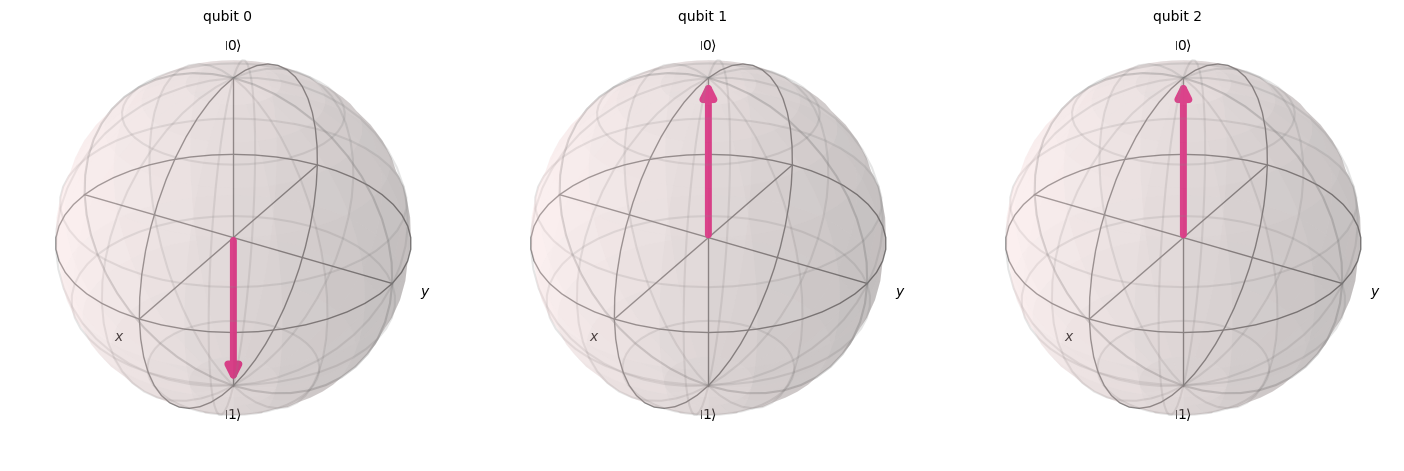

In [313]:
# Define the quantum circuit
qc = QuantumCircuit(3)

# Initialize the state |001>
# !The order is inverted |q2 q1 q0>
qc.x(0)
# qc.x(1)
# qc.x(2)
qc.barrier()

# Draw initial state on Bloch sphere
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

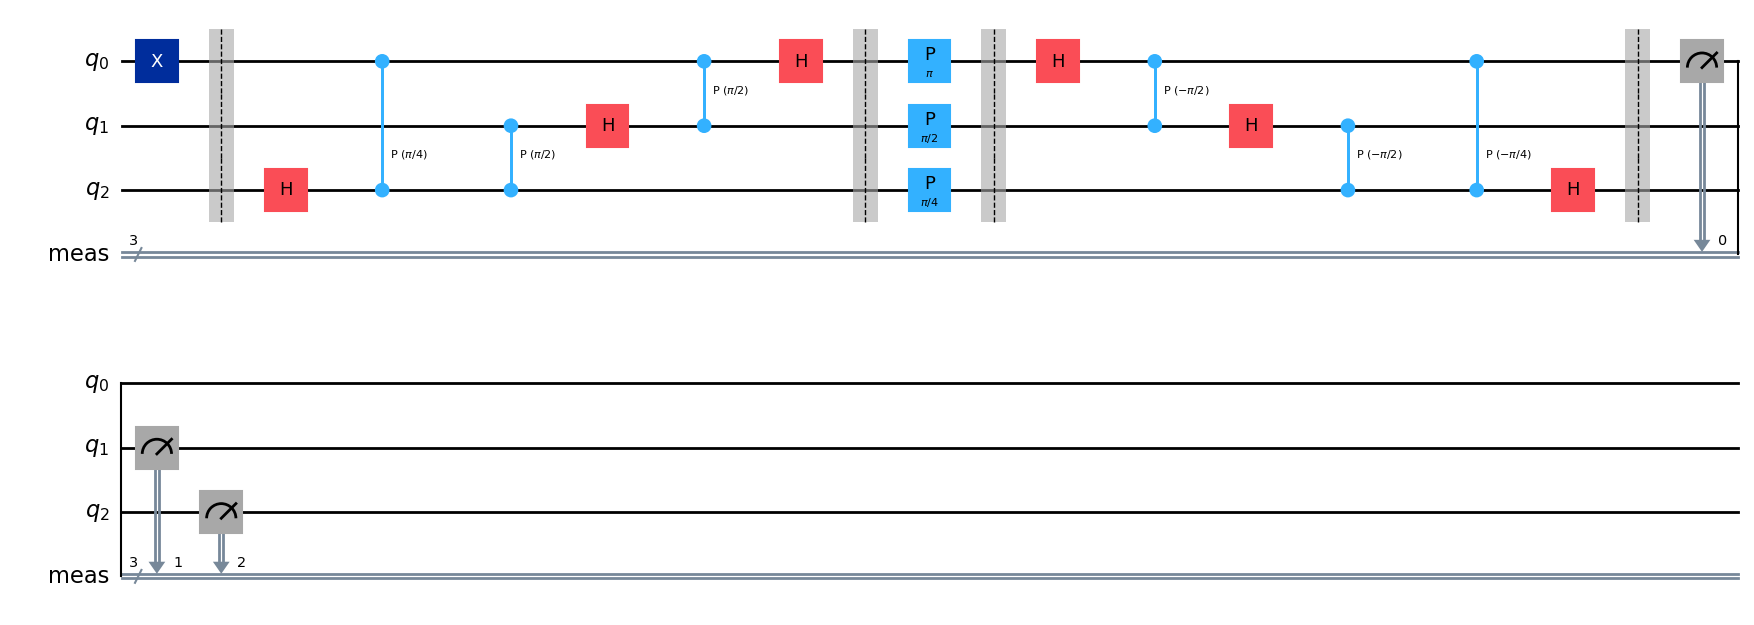

In [ ]:
# QFT implementation
qc.h(2)
qc.cp(np.pi / 2**2, 0, 2)
qc.cp(np.pi / 2, 1, 2)
qc.h(1)
qc.cp(np.pi / 2, 0, 1)
qc.h(0)
qc.barrier()

# Phase gates for counting
qc.p(np.pi, 0)
qc.p(np.pi / 2, 1)
qc.p(np.pi / 4, 2)
qc.barrier()

# IQFT implementation
qc.h(0)
qc.cp(-np.pi / 2, 0, 1)
qc.h(1)
qc.cp(-np.pi / 2, 1, 2)
qc.cp(-np.pi / 2**2, 0, 2)
qc.h(2)

# Swap qubits to reverse the order
# qc.swap(0, 2)

# qc.measure_all()

# draw the circuit
qc.draw('mpl')

Statevector([-0.+0.j, -0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j,
             -0.+0.j],
            dims=(2, 2, 2))


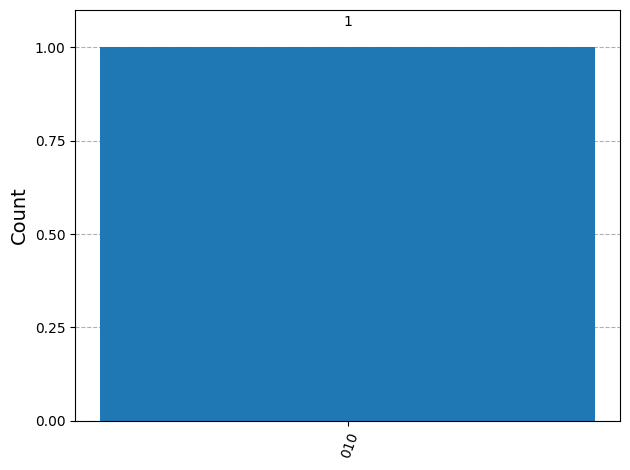

In [315]:
# Define the simulator
backend = Aer.get_backend("statevector_simulator")

# Compile the circuit on the computer or simulator
compiled_circuit = transpile(qc, backend=backend)
# Execute the circuit on the simulator
job = backend.run(compiled_circuit, shots=1)
# Get the results of the execution
result = job.result()
# Get the counts of the results
counts = result.get_counts(qc)
# print the results as a state vector
print(result.get_statevector(compiled_circuit, decimals=3))
# Plot the results as a histogram
plot_histogram(counts)